### 문제1) 2017년 매출 Top5 카테고리 추출
- olist_orders 에서 2017년에 발생한 주문만 사용한다.
- olist_order_items 에 있는 상품 가격을 활용한다.
- 상품의 카테고리 명을 출력하기 위해서 oolist_orders를 통해 주문한 상품 고유 id를 가져오고 olist_products 에서 상품 고유 id에 해당하는 카테고리명(포르투갈 어)을 가져오고 product_category_name_translation를 통해 영어로된 카테고리 명을 가져온다
- 각 카테고리별 상품의 총액을 구한다음 상위 5개 상품를 영문 카테고리명과 함께 출력을 한다.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 그래프 기본설정",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 주문 고유 id와 상품 가격
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
# olist_orders에 있는 주문 고유 id 와 동일한 주문 id의 상품 id
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
# olist_order_items에 있는 상품 id와 동일한 상품 카테고리 명(포르투갈 어)
olist_products = pd.read_csv('olist/olist_products_dataset.csv')
# olist_products에 있는 상품 카테고리 명(포르투갈 어)의 영어 상품 카테고리 명
product_category_name_translation = pd.read_csv('olist/product_category_name_translation.csv')

In [3]:
# olist_orders 에 있는 order_purchase_timestamp 컬럼 값을 시간 형태로 변환한다.
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [4]:
# 2017년 주문건만 사용한다.
# orders_2017 = olist_orders.query('order_purchase_timestamp >= "2017-01-01" and order_purchase_timestamp <= "2017-12-31"')
orders_2017 = olist_orders[olist_orders['order_purchase_timestamp'].dt.year == 2017]
print(orders_2017['order_purchase_timestamp'].max())
print(orders_2017['order_purchase_timestamp'].min())

2017-12-31 23:29:31
2017-01-05 11:56:06


In [5]:
# 병합한다.
df = pd.merge(orders_2017, olist_order_items, left_on='order_id', right_on='order_id', how='inner')
df = pd.merge(df, olist_products, left_on='product_id', right_on='product_id', how='inner')
df = pd.merge(df, product_category_name_translation, left_on='product_category_name', right_on='product_category_name_english', how='inner')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_y,product_category_name_english
0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,pet_shop
1,86b37610c0e86e94afe3d5ba4b73fa14,86ff82570097f39b2193254f540e4a69,delivered,2017-11-17 21:14:42,2017-11-22 02:49:29,2017-11-22 17:37:09,2017-12-05 20:23:33,2017-12-20 00:00:00,1,77ccbcf251886c8b83676fc918e7336c,...,pet_shop,55.0,499.0,4.0,200.0,27.0,9.0,26.0,pet_shop,pet_shop
2,86b37610c0e86e94afe3d5ba4b73fa14,86ff82570097f39b2193254f540e4a69,delivered,2017-11-17 21:14:42,2017-11-22 02:49:29,2017-11-22 17:37:09,2017-12-05 20:23:33,2017-12-20 00:00:00,2,1e56c680b07833e85fec6904b2c7e4b8,...,pet_shop,58.0,502.0,4.0,200.0,27.0,9.0,26.0,pet_shop,pet_shop
3,6245ae0abd9de1ae647b5da78c0ea69b,d68585c54450af4bfc04cc6cccbcd607,delivered,2017-09-11 07:54:38,2017-09-11 08:10:08,2017-09-13 18:22:19,2017-09-16 16:12:24,2017-09-27 00:00:00,1,8d1cfc0463b545928bfb4e589e017bd4,...,market_place,55.0,1626.0,1.0,175.0,17.0,10.0,19.0,market_place,market_place
4,74ebfa44a323c96a7760bd693d690a3d,13fd7ce9f08449dec2533119379a2527,delivered,2017-06-16 00:22:49,2017-06-16 00:35:26,2017-06-16 15:37:52,2017-06-26 13:49:52,2017-07-18 00:00:00,1,7d1fc7d682f6a5c8e47437e3540f4415,...,cool_stuff,59.0,812.0,3.0,3400.0,37.0,27.0,22.0,cool_stuff,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,2d74fd323d42fddd4e9a4398d5c589c6,17089785734f497b2cd404fc39932fda,delivered,2017-08-08 17:18:06,2017-08-08 17:38:11,2017-08-09 18:32:53,2017-08-14 21:22:13,2017-08-21 00:00:00,1,4c2c252ccca76d23a1ebdb3aa61e69d6,...,cool_stuff,55.0,940.0,1.0,2000.0,42.0,25.0,15.0,cool_stuff,cool_stuff
4209,0c699835432f5ca06e878ed73f893b05,662c1ac3aa47279d8438c925af1fc53d,delivered,2017-04-26 15:59:59,2017-04-26 16:10:17,2017-04-27 10:52:05,2017-05-17 10:04:51,2017-05-17 00:00:00,1,246d85d18978e56d249ebaf657bb44bc,...,cool_stuff,33.0,677.0,1.0,1650.0,42.0,25.0,15.0,cool_stuff,cool_stuff
4210,20b99bf1ea8fdeca4e8f4872c584d0ec,537f48efc6a44c3400bb053ce4101847,delivered,2017-04-17 12:31:06,2017-04-18 12:44:01,2017-04-25 07:15:53,2017-05-11 10:42:25,2017-05-10 00:00:00,1,6b7739f782cb37f71cc80e8151ebd6ac,...,cool_stuff,51.0,404.0,2.0,1300.0,40.0,30.0,30.0,cool_stuff,cool_stuff
4211,64c448c5b11157c64585eb51d17eafe6,b1625842d297abe930e04274ac7f13a3,delivered,2017-10-10 11:05:35,2017-10-10 11:31:32,2017-10-11 21:25:12,2017-10-23 19:33:02,2017-10-27 00:00:00,1,d7d5562fce331ad958ca6f57057b3526,...,cool_stuff,33.0,910.0,1.0,700.0,42.0,25.0,15.0,cool_stuff,cool_stuff


In [6]:
# 각 카테고리별 매출의 총합을 집계한다.
revenus = df.groupby('product_category_name_english')['price'].sum()
# 값을 기준으로 내림차순 정렬을 한다.
revenus = revenus.sort_values(ascending=False)
# 상위 top 5를 추출한다.
revenus_top5 = revenus.head(5)
revenus_top5

product_category_name_english
cool_stuff        393620.65
consoles_games     88394.45
pet_shop           85081.70
market_place       19506.71
audio              17570.57
Name: price, dtype: float64

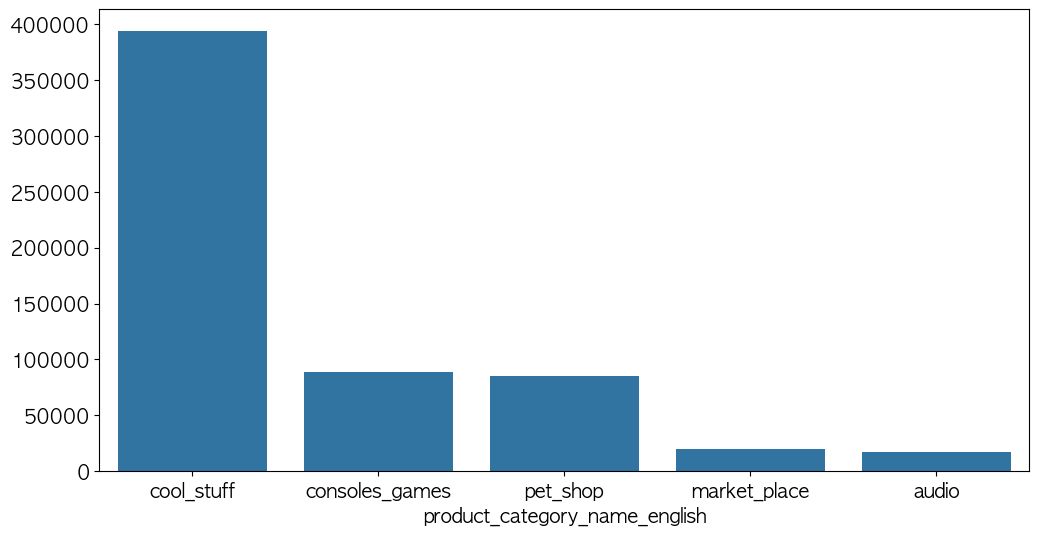

In [7]:
sns.barplot(x=revenus_top5.index, y=revenus_top5.values)
plt.show()

### 문제2) 결제 수단별 사용 비율
- 각 결제 수단별 빈도수를 계산, 비율 계산

In [8]:
olist_order_payments = pd.read_csv('olist/olist_order_payments_dataset.csv')
olist_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
# 각 결제 수단별로 도수분포를 구한다.
# payment_ratio = olist_order_payments['payment_type'].value_counts() / len(olist_order_payments)
payment_ratio = olist_order_payments['payment_type'].value_counts(normalize=True) * 100

print("결제 수단별 비율 (%)")
print(payment_ratio)

결제 수단별 비율 (%)
payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64


<Axes: ylabel='count'>

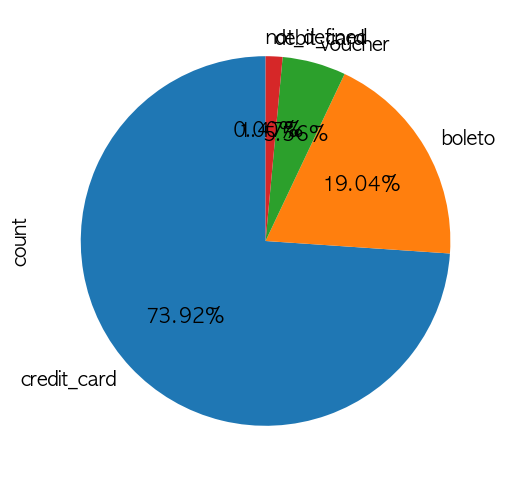

In [10]:
olist_order_payments['payment_type'].value_counts().plot.pie(
    autopct='%.2f%%', startangle=90
)

### 문제3) 배송 미완료 주문 비율 계산
- olist_orders 에 있는 주문상태(order_status) 가 배송 완료(delivered)가 아닌 것들의 비율을 구한다.

In [11]:
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
# 주문 상태가 어떠한 값들이 있는지 확인해본다.
olist_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [13]:
# 배송 완료되지 않은 주문 건을 가져온다.
not_delivered = olist_orders.query('order_status != "delivered"')
# 주문 건 수를 구한다.
not_delivered_count = len(not_delivered['order_id'])
not_delivered_count

2963

In [14]:
# 주문건 수로 나눠서 배송이 완료되지 않는 주문의 비율을 구한다.
ratio = not_delivered_count / len(olist_orders)
ratio

0.029796562785973594

In [15]:
print(f'미 배송 비율 : {(ratio * 100):.2f}%')

미 배송 비율 : 2.98%


### 문제4) 월별 MAU 와 매출 복합 차트 그리기
- MAU (Monthly Active Users) : 한 달 동안 구매 이력이 있는 고유 고객 수
- Revenue : 월별 총 판매 금액 (GMV)

In [16]:
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')

In [17]:
# 날짜 변환
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [18]:
# 병합
df = pd.merge(olist_orders, olist_order_items, left_on='order_id', right_on='order_id', how='inner')
df = pd.merge(df, olist_customers, left_on='customer_id', right_on='customer_id', how='inner')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [19]:
# 주문이 발생한 년-월 형태로 값을 가져와 컬럼으로 추가한다.
df['month'] = df['order_purchase_timestamp'].dt.to_period('M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  object        
 5   order_delivered_carrier_date   111456 non-null  object        
 6   order_delivered_customer_date  110196 non-null  object        
 7   order_estimated_delivery_date  112650 non-null  object        
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

In [20]:
# 월별 데이터를 집계한다.
monthly_kpi = df.groupby('month').agg({
    # 고객 고유 id를 이용해 중복을 제외한 데이터의 개수를 구한 - 고유 고객 수(MAU)
    'customer_unique_id' : 'nunique',
    # 고객별 구매한 가격 총합 - Revenue (매출 합계)
    'price' : 'sum'
})

monthly_kpi.columns = ['MAU', 'Revenue']
monthly_kpi

,MAU,Revenue
month,,
2016-09,3,267.36
2016-10,305,49507.66
2016-12,1,10.90
2017-01,755,120312.87
2017-02,1708,247303.02
2017-03,2601,374344.30
2017-04,2359,359927.23
2017-05,3588,506071.14
2017-06,3154,433038.60


In [21]:
# 2016년 샘플이 부족하고 비어있는 달도 있고 해서 2017년 부터 사용한다.
monthly_kpi = monthly_kpi[monthly_kpi.index >= '2017-01']
monthly_kpi

,MAU,Revenue
month,,
2017-01,755,120312.87
2017-02,1708,247303.02
2017-03,2601,374344.30
2017-04,2359,359927.23
2017-05,3588,506071.14
2017-06,3154,433038.60
2017-07,3894,498031.48
2017-08,4211,573971.68
2017-09,4170,624401.69


In [22]:
# 그래프를 그릴때 x 축에 index를 지정할 것인데 period 타입으로 되어 있기 때문에 문자열로 변환한다
months = monthly_kpi.index.astype('str')
months

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09'],
      dtype='object', name='month')

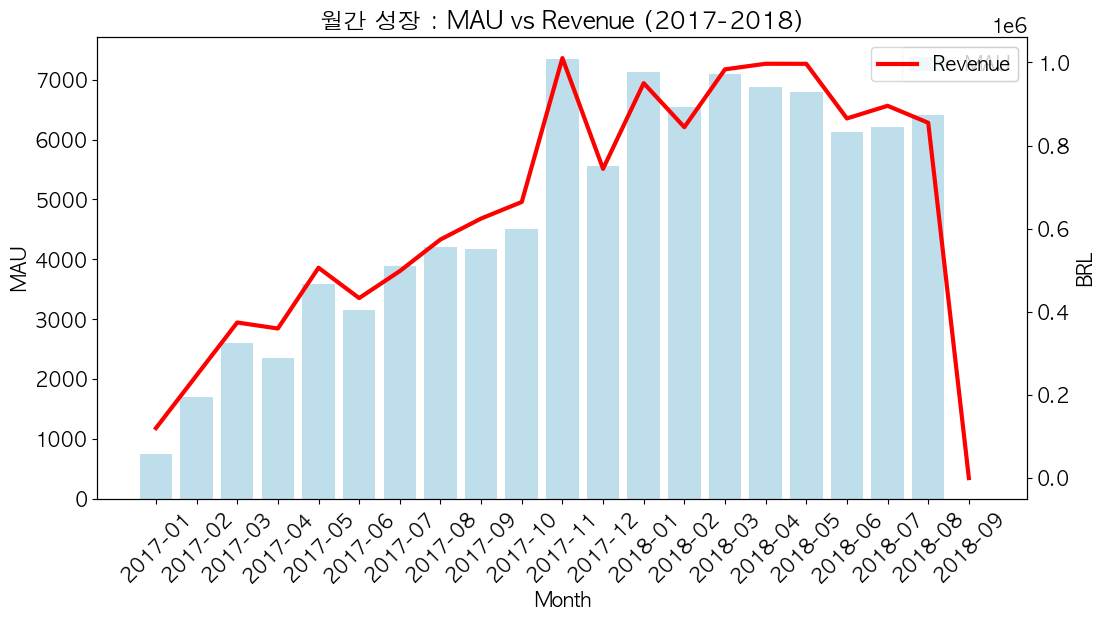

In [23]:
# 이중축을 이용하여 시각화를 해본다
fig, ax1 = plt.subplots()

# 왼쪽 축
sns.barplot(x=months, y=monthly_kpi['MAU'], ax=ax1, color='skyblue', alpha=0.6, label='MAU')
ax1.set_ylabel('MAU')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)

# 오른쪽 축
ax2 = ax1.twinx()
sns.lineplot(x=months, y=monthly_kpi['Revenue'], ax=ax2, color='red', markers='o', linewidth=3, label='Revenue')
ax2.set_ylabel('BRL')

plt.title('월간 성장 : MAU vs Revenue (2017-2018)')
plt.show()

### 문제5) 주(state)별 배송 지연 분석
- 지연 기준 : 실제 배송일 > 예상 배송일
- 물류 병목이 발생하는 문제 지역을 확인해본다.

In [24]:
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')

In [25]:
# 병합
df = pd.merge(olist_orders, olist_customers, left_on='customer_id', right_on='customer_id', how='inner')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [26]:
# 배송이 완료된 제품만 가져온다.
df_delivered = df.query('order_status == "delivered"')
df_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [27]:
# 결측치 확인
df_delivered.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

In [28]:
# order_delivered_customer_date 에 결측치가 있는 행은 제거한다.
df_delivered = df_delivered.dropna(subset='order_delivered_customer_date')
df_delivered.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

In [29]:
# 지연 여부를 타나내는 값을 구해 컬럼으로 추가해준다.
a1 = df_delivered['order_estimated_delivery_date'] < df_delivered['order_delivered_customer_date']
df_delivered['is_late'] = a1
df_delivered

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_5230/1720214697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered['is_late'] = a1


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,False
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,False
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,False
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,False


In [30]:
# 주(state)별 지연율을 계산한다.
# is_late 에는 True나 False 값이 저장되어 있다.
# 이러한 컬럼을 통해 무언가 계산을 하면 True 는 1로, False 는 0으로 취급하여 계산한다.
# 이에 is_late 컬럼의 평균을 구하면 지연율을 구할 수 있다.(지연된 것은 True, 지연되지 않은 것은 False 이므로...)
late_rate = df_delivered.groupby('customer_state')['is_late'].mean()
late_rate = late_rate.sort_values(ascending=False)
late_rate

customer_state
AL    0.239295
MA    0.196653
PI    0.159664
CE    0.153245
SE    0.152239
BA    0.140356
RJ    0.134737
TO    0.127737
PA    0.123679
ES    0.122306
RR    0.121951
MS    0.115549
PB    0.110251
PE    0.107972
RN    0.107595
SC    0.097575
GO    0.081758
RS    0.071482
DF    0.070673
MT    0.067720
SP    0.058947
MG    0.056104
PR    0.049970
AP    0.044776
AM    0.041379
AC    0.037500
RO    0.028807
Name: is_late, dtype: float64

In [31]:
# 지연율이 높은 top 5
late_rate.head(5) * 100

customer_state
AL    23.929471
MA    19.665272
PI    15.966387
CE    15.324472
SE    15.223881
Name: is_late, dtype: float64

### 가설검증 연습
- 배송이 늦을 수록 고객의 평점은 낮을 것이다.
- 주말에 주문하면 배송이 더 오래 걸릴 것이다.
- 같은 주(state) 내 배송이라도 SP(상파울루) 지역이 다른 지역보다 더 빠를 것이다.
- "신용카드" 사용자 보다 할부(Voucher/Boleto) 사용자의 객단가(AOV)가 낮을 것이다.
- 배송비가 비싸면 주문 취소율이 높아질 것이다.
- 제품 설명이 길수록 고객 만족도(평점)가 높을 것이다.
- 사진이 많은 상품이 적은 상품보다 더 잘 팔릴 것이다.
- 카테고리별 평균 배송비 차이가 존재할 것이다.

### 가설1) 배송이 늦을 수록 고객의 평점은 낮을 것이다.
- 상관관계 분석

In [32]:
olist_order_reviews = pd.read_csv('olist/olist_order_reviews_dataset.csv')
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')

In [33]:
# 위에서 생성한 df_delivered와 병합한다.
df = pd.merge(df_delivered, olist_order_reviews, left_on='order_id', right_on='order_id', how='inner')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,is_late,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,False,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,False,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,False,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,False,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,False,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96348,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,False,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
96349,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,False,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
96350,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,False,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
96351,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,False,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [34]:
# 병합
df = pd.merge(olist_order_reviews, olist_orders, left_on='order_id', right_on='order_id', how='inner')
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20 00:00:00
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00


In [35]:
# 배송이 완료된 주문만 가져온다.
df_delivered = df.query('order_status == "delivered"')
df_delivered

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20 00:00:00
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00


In [36]:
# 결측치 확인
df_delivered.isna().sum()
# 결측치가 있는 행을 제거한다.
df_delivered = df_delivered.dropna(subset=['order_delivered_customer_date'])
df_delivered.isna().sum()

review_id                            0
order_id                             0
review_score                         0
review_comment_title             85149
review_comment_message           57259
review_creation_date                 0
review_answer_timestamp              0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         1
order_delivered_customer_date        0
order_estimated_delivery_date        0
dtype: int64

In [37]:
# 시간값 타입을 변경한다.
df_delivered['order_purchase_timestamp'] = pd.to_datetime(df_delivered['order_purchase_timestamp'])
df_delivered['order_delivered_customer_date'] = pd.to_datetime(df_delivered['order_delivered_customer_date'])
df_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96353 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      96353 non-null  object        
 1   order_id                       96353 non-null  object        
 2   review_score                   96353 non-null  int64         
 3   review_comment_title           11204 non-null  object        
 4   review_comment_message         39094 non-null  object        
 5   review_creation_date           96353 non-null  object        
 6   review_answer_timestamp        96353 non-null  object        
 7   customer_id                    96353 non-null  object        
 8   order_status                   96353 non-null  object        
 9   order_purchase_timestamp       96353 non-null  datetime64[ns]
 10  order_approved_at              96339 non-null  object        
 11  order_delivered_carr

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_5230/1045813137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered['order_purchase_timestamp'] = pd.to_datetime(df_delivered['order_purchase_timestamp'])
/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_5230/1045813137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered['order_delivered_customer_date'] = pd.to_datetime(df_delivered['order_delivered_customer_date'])


In [38]:
# 실제 배송 기간을 구한다.
df_delivered['delivery_day'] = df_delivered['order_delivered_customer_date'] - df_delivered['order_purchase_timestamp']
df_delivered

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_5230/660152790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered['delivery_day'] = df_delivered['order_delivered_customer_date'] - df_delivered['order_purchase_timestamp']


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,6 days 03:11:52
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,9 days 10:52:01
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,13 days 07:32:26
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,10 days 15:27:22
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00,18 days 05:34:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20 00:00:00,8 days 19:51:08
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00,4 days 19:33:37
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00,3 days 07:51:49
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00,7 days 20:10:23


---
#### 내가 푸는거

In [39]:
# 주말에 주문하면 배송이 더 오래 걸릴 것이다. (독립 표본 t-검증)

olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
    # order_purchase_timestamp : 주문 접수 시각 - 쓸거
    # order_delivered_customer_date : 실제 고객 배송 시각 - 쓸거

In [40]:
# 날짜 형식 변환
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders['order_delivered_customer_date'] = pd.to_datetime(olist_orders['order_delivered_customer_date'])
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [41]:
# 요일을 추출한다.
olist_orders['day_of_week'] = olist_orders['order_purchase_timestamp'].dt.day_name()
olist_orders['day_of_week'].value_counts()

day_of_week
Monday       16196
Tuesday      15963
Wednesday    15552
Thursday     14761
Friday       14122
Sunday       11960
Saturday     10887
Name: count, dtype: int64

In [42]:
# 배송 소요 일수 계산
olist_orders["delivery_days"] = (olist_orders["order_delivered_customer_date"]- olist_orders["order_purchase_timestamp"]).dt.days
olist_orders = olist_orders.dropna(subset=["delivery_days"])

In [43]:
olist_orders["is_weekend"] = olist_orders["day_of_week"].isin(["Saturday", "Sunday"])

In [44]:
weekend_delivery = olist_orders.loc[olist_orders["is_weekend"], "delivery_days"]

weekday_delivery = olist_orders.loc[~olist_orders["is_weekend"], "delivery_days"]


In [45]:
weekend_delivery.describe(), weekday_delivery.describe()

(count    22190.000000
 mean        12.150158
 std          9.423630
 min          1.000000
 25%          6.000000
 50%         10.000000
 75%         16.000000
 max        165.000000
 Name: delivery_days, dtype: float64,
 count    74286.000000
 mean        12.077336
 std          9.589683
 min          0.000000
 25%          6.000000
 50%         10.000000
 75%         15.000000
 max        209.000000
 Name: delivery_days, dtype: float64)

In [46]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    weekend_delivery,
    weekday_delivery,
    equal_var=False  # 분산 다르다고 가정 (Welch t-test)
)

t_stat, p_value

(np.float64(1.0059939751167026), np.float64(0.3144250501474276))

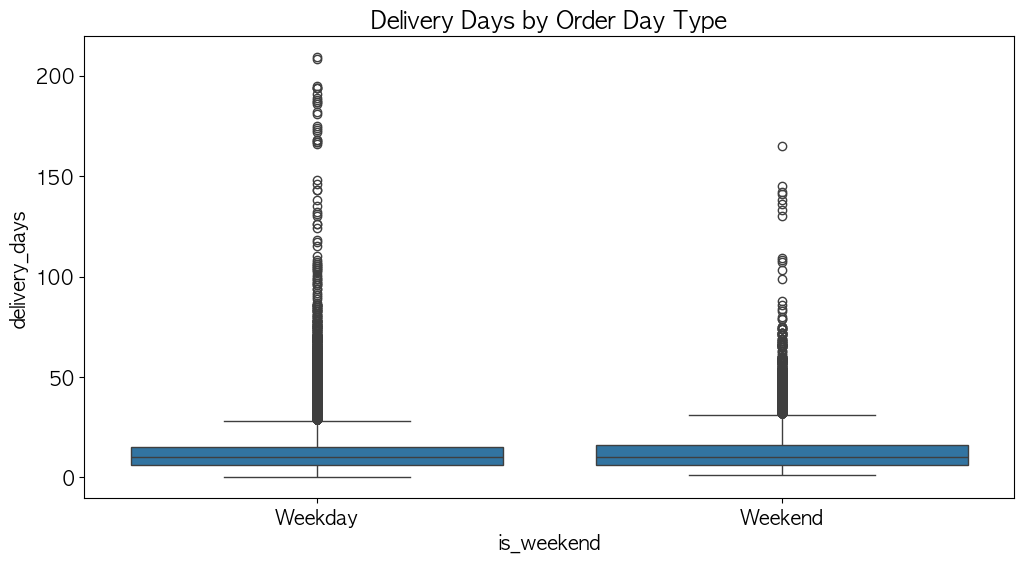

In [47]:
sns.boxplot(
    data=olist_orders,
    x="is_weekend",
    y="delivery_days"
)

plt.xticks([0, 1], ["Weekday", "Weekend"])
plt.title("Delivery Days by Order Day Type")
plt.show()

---

In [48]:
# 같은 주(state) 내 배송이라도 SP(상파울루) 지역이 다른 지역보다 더 빠를 것이다.

olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')
    # customer_state : 고객 거주 주 - 쓸거
    # customer_id : 주문별 ID - 결합
olist_sellers = pd.read_csv('olist/olist_sellers_dataset.csv')
    # seller_state : 판매자 주(state) - 쓸거
    # seller_id : 판매자 고유 식별자 - 결합
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
    # seller_id : 판매자 고유 식별자 - 결합
    # order_id : 주문 고유 식별자 - 결합
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
    # order_id : 주문 고유 식별자 - 결합
    # customer_id : 주문한 고객 ID (Customers 테이블과 연결) - 결합
    # order_purchase_timestamp : 주문 접수 시각 - 쓸거
    # order_delivered_customer_date : 실제 고객 배송 시각 - 쓸거

In [49]:
customer_order = pd.merge(olist_customers,olist_orders,on='customer_id',how='inner')
customer_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


In [50]:
customer_order_items = pd.merge(customer_order,olist_order_items,on='order_id',how='inner')
customer_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

In [51]:
delivery_state = pd.merge(customer_order_items,olist_sellers,on='seller_id',how='inner')
delivery_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

In [52]:
delivery_state = delivery_state.query('seller_state == customer_state')

In [53]:
delivery_state = delivery_state.copy()

delivery_state["order_purchase_timestamp"] = pd.to_datetime(
    delivery_state["order_purchase_timestamp"], errors="coerce"
)
delivery_state["order_delivered_customer_date"] = pd.to_datetime(
    delivery_state["order_delivered_customer_date"], errors="coerce"
)

In [54]:
delivery_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40756 entries, 0 to 112649
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    40756 non-null  object        
 1   customer_unique_id             40756 non-null  object        
 2   customer_zip_code_prefix       40756 non-null  int64         
 3   customer_city                  40756 non-null  object        
 4   customer_state                 40756 non-null  object        
 5   order_id                       40756 non-null  object        
 6   order_status                   40756 non-null  object        
 7   order_purchase_timestamp       40756 non-null  datetime64[ns]
 8   order_approved_at              40752 non-null  object        
 9   order_delivered_carrier_date   40197 non-null  object        
 10  order_delivered_customer_date  39863 non-null  datetime64[ns]
 11  order_estimated_del

In [55]:
# slice → 명시적 copy
delivery_state = delivery_state.copy()

# 배송 소요 일수 계산
delivery_state["delivery_days"] = (
    delivery_state["order_delivered_customer_date"]
    - delivery_state["order_purchase_timestamp"]
).dt.days

# 결측치 제거
delivery_state = delivery_state.dropna(subset=["delivery_days"])

In [56]:
delivery_state["is_sp"] = delivery_state["seller_state"].isin(["SP"])
delivery_state

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,delivery_days,is_sp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577,itaquaquecetuba,SP,8.0,True
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577,itaquaquecetuba,SP,26.0,True
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577,itaquaquecetuba,SP,14.0,True
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940,ibitinga,SP,11.0,True
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,b5466db4cecf95c3c1be0ba32538ce1a,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102,sao paulo,SP,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112641,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP,ca978d2459ea2c5ef6d5fde02be26b9c,delivered,2018-03-06 09:16:56,2018-03-06 09:29:07,2018-03-06 18:51:58,...,163da86e86f0089de089399c28c3fcbb,9f505651f4a6abe901a56cdc21508025,2018-03-13 09:29:07,99.00,9.59,4102,sao paulo,SP,1.0,True
112643,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP,97d6c1727b0d36b8d04035e35d86f40f,delivered,2018-05-18 21:42:33,2018-05-18 21:55:14,2018-06-04 16:03:00,...,e0d64dcfaa3b6db5c54ca298ae101d05,2eb70248d66e0e3ef83659f71b244378,2018-05-29 21:55:14,124.90,7.74,13101,campinas,SP,17.0,True
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,17400,garca,SP,6.0,True
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,14802,araraquara,SP,7.0,True


In [57]:
sp_delivery = delivery_state.loc[delivery_state["is_sp"], "delivery_days"]

notsp_delivery = delivery_state.loc[~delivery_state["is_sp"], "delivery_days"]

In [58]:
t_stat, p_value = ttest_ind(
    sp_delivery,
    notsp_delivery,
    equal_var=False  # 분산 다르다고 가정 (Welch t-test)
)

t_stat, p_value

(np.float64(0.02312045623534911), np.float64(0.9815550091225227))

In [59]:
sp_delivery.mean(), notsp_delivery.mean()

(np.float64(7.461462450592886), np.float64(7.459149223497636))

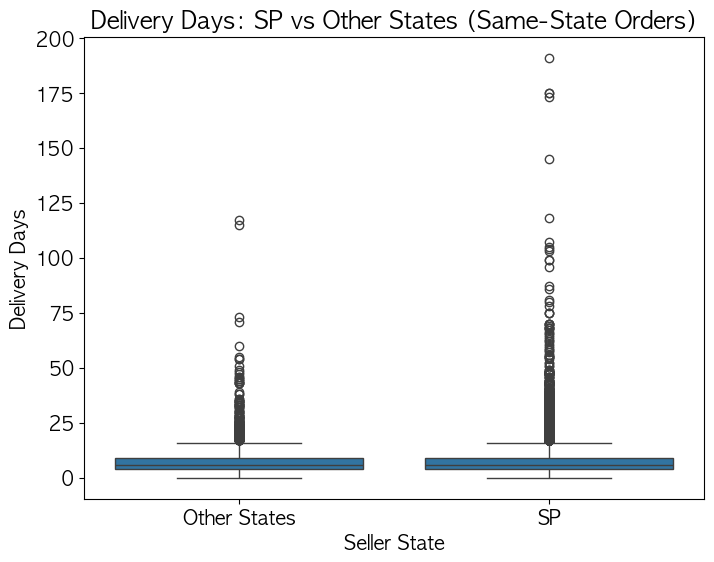

In [60]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=delivery_state,
    x="is_sp",
    y="delivery_days"
)

plt.xticks([0, 1], ["Other States", "SP"])
plt.xlabel("Seller State")
plt.ylabel("Delivery Days")
plt.title("Delivery Days: SP vs Other States (Same-State Orders)")
plt.show()

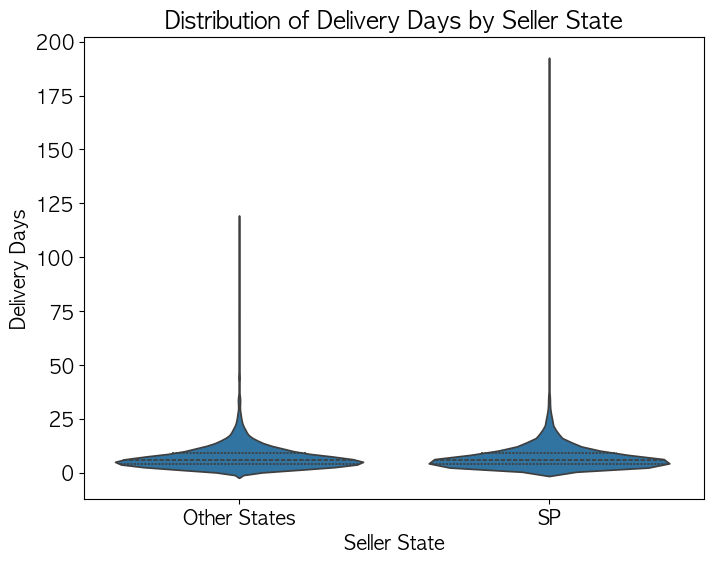

In [61]:
plt.figure(figsize=(8, 6))

sns.violinplot(
    data=delivery_state,
    x="is_sp",
    y="delivery_days",
    inner="quartile"
)

plt.xticks([0, 1], ["Other States", "SP"])
plt.xlabel("Seller State")
plt.ylabel("Delivery Days")
plt.title("Distribution of Delivery Days by Seller State")
plt.show()


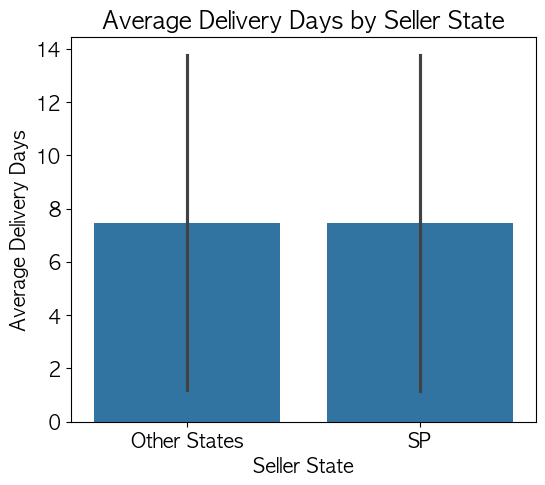

In [62]:
plt.figure(figsize=(6, 5))

sns.barplot(
    data=delivery_state,
    x="is_sp",
    y="delivery_days",
    errorbar="sd"
)

plt.xticks([0, 1], ["Other States", "SP"])
plt.xlabel("Seller State")
plt.ylabel("Average Delivery Days")
plt.title("Average Delivery Days by Seller State")
plt.show()


---

In [63]:
# "신용카드" 사용자 보다 할부(Voucher/Boleto) 사용자의 객단가(AOV)가 낮을 것이다.(독립 표본 t- 검증)
olist_payments = pd.read_csv("olist/olist_order_payments_dataset.csv")

In [64]:
order_payment = (olist_payments.groupby(["order_id", "payment_type"], as_index=False).agg({"payment_value": "sum"}))
order_payment

,order_id,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04
...,...,...,...
101681,fffc94f6ce00a00581880bf54a75a037,boleto,343.40
101682,fffcd46ef2263f404302a634eb57f7eb,boleto,386.53
101683,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85
101684,fffe18544ffabc95dfada21779c9644f,credit_card,64.71


In [65]:
credit = order_payment.loc[order_payment["payment_type"] == "credit_card","payment_value"]

voucher_boleto = order_payment.loc[order_payment["payment_type"].isin(["voucher", "boleto"]),"payment_value"]

In [66]:
t_stat, p_value = ttest_ind(
    credit,
    voucher_boleto,
    equal_var=False
)

credit.mean(), voucher_boleto.mean(), t_stat, p_value

(np.float64(163.93809803280834),
 np.float64(137.3699002114165),
 np.float64(17.071662190897438),
 np.float64(3.9787378545062475e-65))

---

In [67]:
# 배송비가 비싸면 주문 취소율이 높아질 것이다.(카이제곱 검정)
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
    # freight_value : 배송비 - 쓸거
    # order_id : 주문 고유 식별자 - 결합
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
    # order_id : 주문 고유 식별자 - 결합
    # order_status : 주문 상태 (delivered, shipped, canceled 등) - 쓸거

In [68]:
freight_order = pd.merge(olist_order_items[["freight_value", "order_id"]],olist_orders[["order_id", "order_status"]],on="order_id",how="inner")

freight_order

,freight_value,order_id,order_status
0,13.29,00010242fe8c5a6d1ba2dd792cb16214,delivered
1,19.93,00018f77f2f0320c557190d7a144bdd3,delivered
2,17.87,000229ec398224ef6ca0657da4fc703e,delivered
3,12.79,00024acbcdf0a6daa1e931b038114c75,delivered
4,18.14,00042b26cf59d7ce69dfabb4e55b4fd9,delivered
...,...,...,...
112645,43.41,fffc94f6ce00a00581880bf54a75a037,delivered
112646,36.53,fffcd46ef2263f404302a634eb57f7eb,delivered
112647,16.95,fffce4705a9662cd70adb13d4a31832d,delivered
112648,8.72,fffe18544ffabc95dfada21779c9644f,delivered


In [69]:
# 주문별 배송비(아이템 freight 합)로 집계
freight_by_order = (olist_order_items.groupby("order_id", as_index=False)["freight_value"].sum())

# 주문 상태 붙이기
freight_order = pd.merge(freight_by_order,olist_orders[["order_id", "order_status"]],on="order_id",how="inner")

In [70]:
freight_order["is_canceled"] = (freight_order["order_status"] == "canceled")

In [71]:
q75 = freight_order["freight_value"].quantile(0.75)

freight_order["freight_level"] = pd.cut(freight_order["freight_value"],bins=[-float("inf"), q75, float("inf")],labels=["Low/Medium", "High"])

In [72]:
contingency = pd.crosstab(freight_order["freight_level"],freight_order["is_canceled"])

contingency

is_canceled,False,True
freight_level,,
Low/Medium,73647,354
High,24558,107


In [73]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)

chi2, p, dof

(np.float64(0.6968942765955412), np.float64(0.4038292342100116), 1)

In [74]:
cancel_rate = contingency.div(contingency.sum(axis=1), axis=0)[True]
cancel_rate

freight_level
Low/Medium    0.004784
High          0.004338
Name: True, dtype: float64

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_5230/979832243.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freight_order.groupby("freight_level", as_index=False)


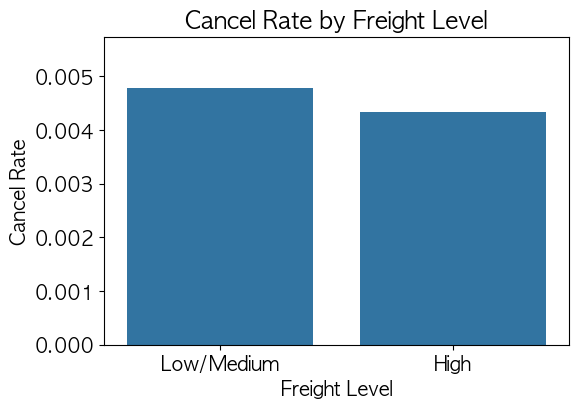

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = (
    freight_order.groupby("freight_level", as_index=False)
    .agg(cancel_rate=("is_canceled", "mean"))
)

plt.figure(figsize=(6,4))
sns.barplot(data=plot_df, x="freight_level", y="cancel_rate")
plt.ylabel("Cancel Rate")
plt.xlabel("Freight Level")
plt.title("Cancel Rate by Freight Level")
plt.ylim(0, plot_df["cancel_rate"].max() * 1.2)
plt.show()

---

In [76]:
# 제품 설명이 길수록 고객 만족도(평점)가 높을 것이다.(피어슨 상관분석)
olist_products = pd.read_csv('olist/olist_products_dataset.csv')
    # product_description_lenght : 상품 설명 길이 - 쓸거
    # product_id : 상품 고유 식별자 - 결합
olist_order_reviews = pd.read_csv('olist/olist_order_reviews_dataset.csv')
    # review_score : 리뷰 점수 (1-5점) - 쓸거
    # order_id : 주문 고유 식별자 - 결합
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
    # order_id : 주문 고유 식별자 - 결합
    # product_id : 상품 고유 식별자 - 결합

In [77]:
items = pd.merge(olist_products[['product_description_lenght','product_id']],olist_order_items[['order_id','product_id']],on='product_id',how='inner')
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_description_lenght  111047 non-null  float64
 1   product_id                  112650 non-null  object 
 2   order_id                    112650 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


In [78]:
review_description = pd.merge(items,olist_order_reviews[['review_score','order_id']],on='order_id',how='inner')
review_description

,product_description_lenght,product_id,order_id,review_score
0,287.0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,5
1,276.0,3aa071139cb16b67ca9e5dea641aaa2f,5236307716393b7114b53ee991f36956,5
2,250.0,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,5
3,261.0,cef67bcfe19066a932b7673e239eb23d,143d00a4f2dde4e0364ee1821577adb3,1
4,402.0,9dc1a7de274444849c219cff195d0b71,86cafb8794cb99a9b1b77fc8e48fbbbb,5
...,...,...,...,...
112367,156.0,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,4
112368,156.0,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,5
112369,156.0,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,5
112370,156.0,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,5


In [79]:
# 주문 단위로 상품 설명 길이 평균
order_desc = (
    review_description
    .groupby("order_id", as_index=False)
    .agg(
        avg_desc_len=("product_description_lenght", "mean"),
        review_score=("review_score", "mean")
    )
)

In [80]:
order_desc = order_desc.dropna(subset=["avg_desc_len", "review_score"])
order_desc

,order_id,avg_desc_len,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,598.0,5.0
1,00018f77f2f0320c557190d7a144bdd3,239.0,4.0
2,000229ec398224ef6ca0657da4fc703e,695.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,480.0,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,409.0,5.0
...,...,...,...
97912,fffc94f6ce00a00581880bf54a75a037,1002.0,5.0
97913,fffcd46ef2263f404302a634eb57f7eb,232.0,5.0
97914,fffce4705a9662cd70adb13d4a31832d,869.0,5.0
97915,fffe18544ffabc95dfada21779c9644f,1306.0,5.0


In [81]:
from scipy.stats import pearsonr

r, p_value = pearsonr(
    order_desc["avg_desc_len"],
    order_desc["review_score"]
)

r, p_value

(np.float64(0.011074456035317357), np.float64(0.0005796606509733601))

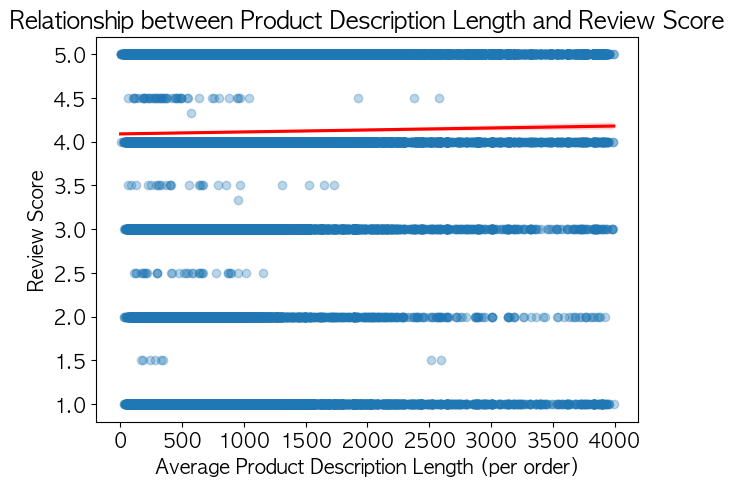

In [82]:
plt.figure(figsize=(7, 5))

sns.regplot(
    data=order_desc,
    x="avg_desc_len",
    y="review_score",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)

plt.xlabel("Average Product Description Length (per order)")
plt.ylabel("Review Score")
plt.title("Relationship between Product Description Length and Review Score")
plt.show()

---

In [83]:
# 사진이 많은 상품이 적은 상품보다 더 잘 팔릴 것이다.(독립표본 t-검증)
olist_products = pd.read_csv("olist/olist_products_dataset.csv")
olist_order_items = pd.read_csv("olist/olist_order_items_dataset.csv")

In [84]:
product_sales = (
    olist_order_items
    .groupby("product_id")
    .size()
    .reset_index(name="sales_count")
)

In [85]:
product_df = pd.merge(
    olist_products[["product_id", "product_photos_qty"]],
    product_sales,
    on="product_id",
    how="inner"
)

product_df.head()


,product_id,product_photos_qty,sales_count
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,1
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,1
2,96bd76ec8810374ed1b65e291975717f,1.0,1
3,cef67bcfe19066a932b7673e239eb23d,1.0,1
4,9dc1a7de274444849c219cff195d0b71,4.0,1


In [86]:
median_photos = product_df["product_photos_qty"].median()

product_df["photo_group"] = pd.cut(
    product_df["product_photos_qty"],
    bins=[-1, median_photos, product_df["product_photos_qty"].max()],
    labels=["Low Photos", "High Photos"]
)


In [87]:
low_sales = product_df.loc[
    product_df["photo_group"] == "Low Photos",
    "sales_count"
]

high_sales = product_df.loc[
    product_df["photo_group"] == "High Photos",
    "sales_count"
]


In [88]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    high_sales,
    low_sales,
    equal_var=False
)

high_sales.mean(), low_sales.mean(), t_stat, p_value


(np.float64(3.470792329043654),
 np.float64(3.397901631390624),
 np.float64(0.6134493451137762),
 np.float64(0.5395837284016719))

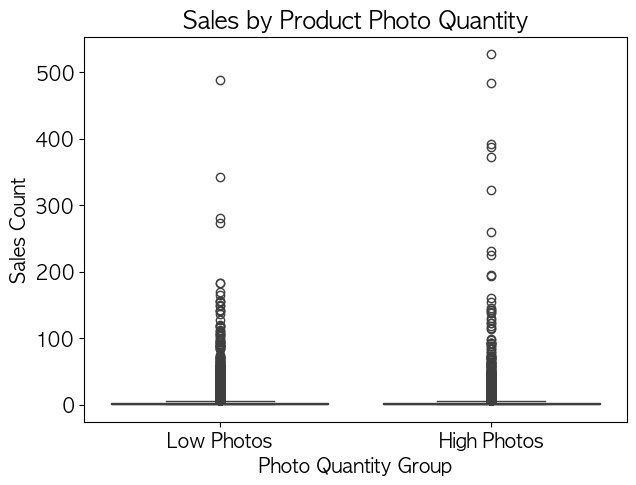

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(
    data=product_df,
    x="photo_group",
    y="sales_count"
)

plt.xlabel("Photo Quantity Group")
plt.ylabel("Sales Count")
plt.title("Sales by Product Photo Quantity")
plt.show()


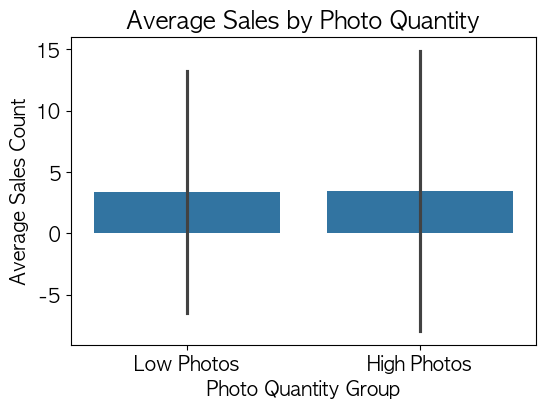

In [90]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=product_df,
    x="photo_group",
    y="sales_count",
    errorbar="sd"
)

plt.xlabel("Photo Quantity Group")
plt.ylabel("Average Sales Count")
plt.title("Average Sales by Photo Quantity")
plt.show()


---

In [91]:
# 카테고리별 평균 배송비 차이가 존재할 것이다.(ANOVA)
olist_order_items = pd.read_csv("olist/olist_order_items_dataset.csv")
olist_products = pd.read_csv("olist/olist_products_dataset.csv")
category_trans = pd.read_csv("olist/product_category_name_translation.csv")

In [92]:
items = pd.merge(
    olist_order_items[["order_id", "product_id", "freight_value"]],
    olist_products[["product_id", "product_category_name"]],
    on="product_id",
    how="inner"
)


In [93]:
order_freight = (
    items.groupby(["order_id", "product_category_name"], as_index=False)
         .agg(total_freight=("freight_value", "sum"))
)


In [94]:
# 카테고리별 표본 수 확인
category_counts = order_freight["product_category_name"].value_counts()

# 최소 30건 이상 카테고리만 사용 (권장)
valid_categories = category_counts[category_counts >= 30].index

anova_df = order_freight[
    order_freight["product_category_name"].isin(valid_categories)
].copy()


In [95]:
from scipy.stats import f_oneway

groups = [
    group["total_freight"].values
    for _, group in anova_df.groupby("product_category_name")
]

f_stat, p_value = f_oneway(*groups)

f_stat, p_value


(np.float64(120.55923716410459), np.float64(0.0))

In [96]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(
    "total_freight ~ C(product_category_name)",
    data=anova_df
).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(product_category_name),3.162667e+06,61.0,120.559237,0.0
Residual,4.204639e+07,97770.0,NaN,NaN


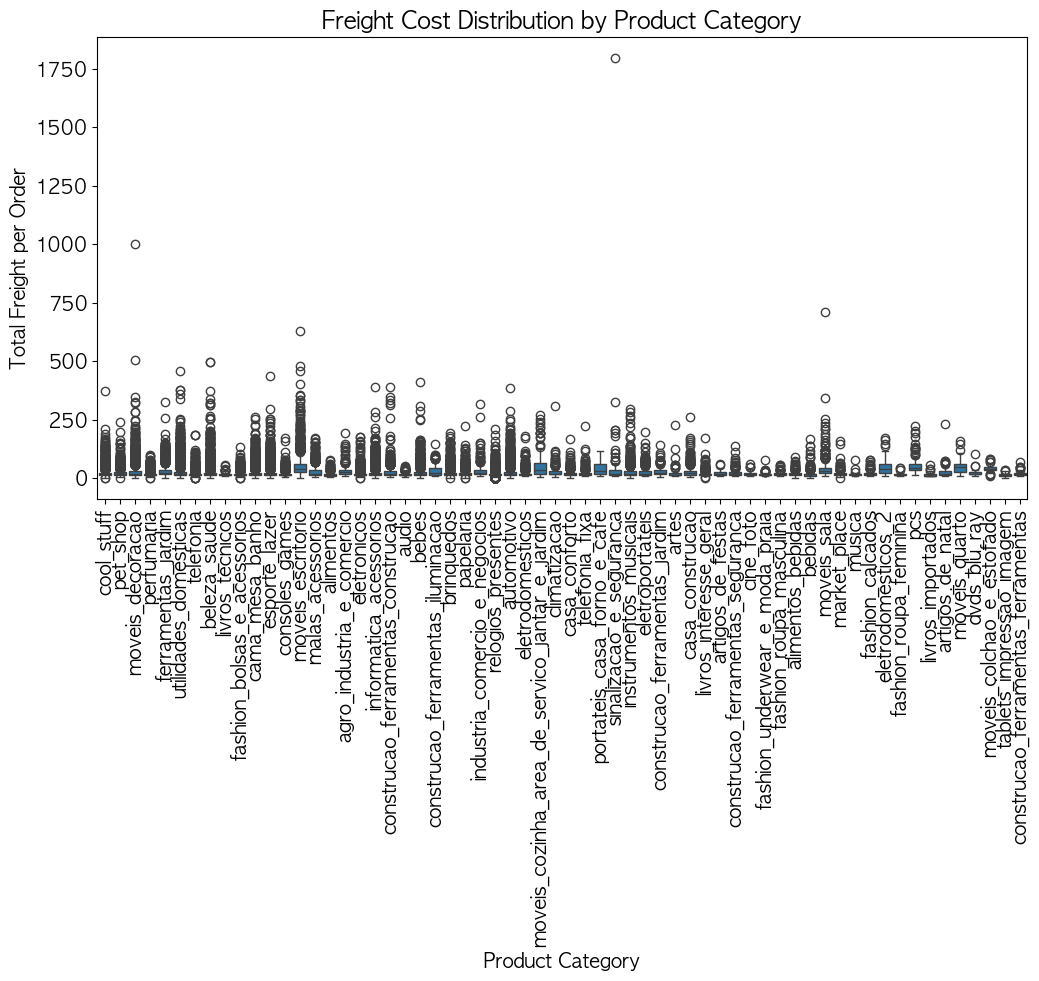

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.boxplot(
    data=anova_df,
    x="product_category_name",
    y="total_freight"
)

plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Total Freight per Order")
plt.title("Freight Cost Distribution by Product Category")
plt.show()


In [98]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=anova_df["total_freight"],
    groups=anova_df["product_category_name"],
    alpha=0.05
)

print(tukey)


                                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                                          
                    group1                                         group2                     meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------------------------------------------------
                     agro_industria_e_comercio                                      alimentos -15.9498    0.0 -23.4026  -8.4971   True
                     agro_industria_e_comercio                              alimentos_bebidas -12.2487    0.0   -20.69  -3.8074   True
                     agro_industria_e_comercio                                          artes -12.0821    0.0 -20.7528  -3.4114   True
                     agro_industria_e_comercio                              artigos_de_festas -10.8777 0.7562 -25.8478   4.0925  False
                     agro_industria_e_comercio         

---
#### 선생님 버전

In [99]:
# 사용할 데이터를 모두 불러온다.
customers = pd.read_csv('olist/olist_customers_dataset.csv')
geolocation = pd.read_csv('olist/olist_geolocation_dataset.csv')
items = pd.read_csv('olist/olist_order_items_dataset.csv')
payments = pd.read_csv('olist/olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist/olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist/olist_orders_dataset.csv')
sellers = pd.read_csv('olist/olist_sellers_dataset.csv')
translation = pd.read_csv('olist/product_category_name_translation.csv')
products = pd.read_csv('olist/olist_products_dataset.csv')

### 가설1) 주말에 주문하면 배송이 더 오래 걸릴 것이다

In [100]:
# 날짜변환
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [101]:
# 배송이 완료된 것만 가져온다.
df_h1 = orders.query('order_status == "delivered"')
df_h1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [102]:
# 결측치가 있는 행을 drop 한다
df_h1 = df_h1.dropna(subset=['order_delivered_customer_date'])
df_h1.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

In [103]:
# 각 날짜가 일주일 중에 몇번째 날이지의 값을 가져온다.
# 월요일(0) ~ 일요일(6)
a1 = df_h1['order_purchase_timestamp'].dt.dayofweek
# 주말(5, 6)이면 True, 아니면 False로 구성된 결과를 가져온다.
df_h1['is_weekend'] = a1.isin([5, 6])
df_h1

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_5230/3847987408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h1['is_weekend'] = a1.isin([5, 6])


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_weekend
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,False
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,False
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,False
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,True
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,False


In [104]:
# 배송 소요 일수(배송일) 컬럼 생성
df_h1["delivery_days"] = (
    df_h1["order_delivered_customer_date"] - df_h1["order_purchase_timestamp"]
).dt.days
df_h1 = df_h1.dropna(subset=["delivery_days"])
df_h1 = df_h1.query("delivery_days >= 0")

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_5230/4008849012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h1["delivery_days"] = (


In [105]:
# 주말 주문건과 평일 주문건으로 나눈다.
group_weekend = df_h1.query('is_weekend == True')
group_weekday = df_h1.query('is_weekend == False')

display(group_weekend)
display(group_weekday)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_weekend,delivery_days
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,True,13
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,True,16
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,True,18
22,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,delivered,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21 00:00:00,True,4
29,ecab90c9933c58908d3d6add7c6f5ae3,761df82feda9778854c6dafdaeb567e4,delivered,2018-02-25 13:50:30,2018-02-25 14:47:35,2018-02-26 22:28:50,2018-03-27 23:29:14,2018-04-13 00:00:00,True,30
...,...,...,...,...,...,...,...,...,...,...
99416,c627fe35fce1a754bc5b812d0b8ff379,42b0671b440d1f2527bddd8b723e0a0c,delivered,2018-06-03 18:44:31,2018-06-03 18:55:15,2018-06-04 13:48:00,2018-06-07 13:22:19,2018-07-11 00:00:00,True,3
99427,19dba6d1e58b04e7fc820558a38ea398,cf97e9cf454480b303de6736ddd15fd6,delivered,2018-05-12 13:42:24,2018-05-12 13:55:17,2018-05-16 08:14:00,2018-05-18 17:18:29,2018-06-04 00:00:00,True,6
99429,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,delivered,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17 00:00:00,True,2
99430,c81f74e50f0496fa39716cc77cacd460,7b270ebc87c25c8404348c10ff80a80e,delivered,2018-03-04 22:48:38,2018-03-04 23:09:22,2018-03-05 16:15:04,2018-03-13 18:54:32,2018-03-26 00:00:00,True,8


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_weekend,delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,False,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,False,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,False,9
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,False,2
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,False,9
...,...,...,...,...,...,...,...,...,...,...
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,False,11
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,False,8
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,False,22
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,False,17


In [106]:
from scipy import stats
# "주말에 주문한 주문건과 평일에 주문한 주문건의 배송일 차이는 없다(혹은 유의미하지 않다)"라는 귀무가설을 검증해본다
t_stat, p_val = stats.ttest_ind(group_weekend['delivery_days'], group_weekday['delivery_days'])
print(f'p value : {p_val:.3f}')

p value : 0.319


In [107]:
# 주말에 주문한 주문건과 평일에 주문한 주문건의 평균 배송 기간을 구해본다.
weekend_mean = group_weekend['delivery_days'].mean()
weekday_mean = group_weekday['delivery_days'].mean()

In [108]:
# 주말에 주문한 주문건과 평일에 주문한 주문건의 평균 배송 기간을 구해본다.
weekend_mean = group_weekend['delivery_days'].mean()
weekday_mean = group_weekday['delivery_days'].mean()
print(f'주말 주문건 배송 기간 평균 : {weekend_mean:.2f}')
print(f'평일 주문건 배송 기간 평균 : {weekday_mean:.2f}')

주말 주문건 배송 기간 평균 : 12.15
평일 주문건 배송 기간 평균 : 12.08


- 주말 주문건에 대한 배송기간과 평일 주문건에 대한 배송기간에 대한 P-value가 0.319로써 0.05 이상에 해당하기 때문에 "주말에 주문한 주문건과 평일에 주문한 주문건의 배송일 차이는 없다(혹은 유의미하지 않다)" 라는 귀무 가설을 기각할 수 없다.
- 실제 배송기간 평균을 비교해보면 약 12일로 두 집단간의 차이가 거의 없다.

### 가설2) 같은 주(state) 내 배송이라도 SP(상파울루) 지역이 다른 지역보다 더 빠를 것이다.
- 같은 주(state)주 내 배송을 보는 것이기 때문에 판매자의 주(state)와 구매자의 주(state)가 같은 것만 가져온다.
- 판매자의 주(혹은 구매자의 주)가 SP인 그룹과 SP가 아닌 그룹으로 나눈다.
- 두 그룹간의 배송기간에 대한 독립 t-검증을 수행한다.
- 귀무 가설 : 같은 주 배송건에 대해 상파울루인 지역과 그렇지 않은 지역의 배송기간 차이는 없다(혹은 유의미하지 않다)

In [109]:
# 필요한 데이터들을 병합한다.
df_h2 = pd.merge(df_h1, customers, left_on='customer_id', right_on='customer_id', how='inner')
df_h2 = pd.merge(df_h2, items, left_on='order_id', right_on='order_id', how='inner')
df_h2 = pd.merge(df_h2, sellers, left_on='seller_id', right_on='seller_id', how='inner')
df_h2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_weekend,delivery_days,...,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,False,8,...,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,False,13,...,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,False,9,...,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,True,13,...,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,False,2,...,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110184,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,False,22,...,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,17602,tupa,SP
110185,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,True,24,...,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,8290,sao paulo,SP
110186,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,False,17,...,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG
110187,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,False,17,...,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG


In [110]:
# 같은 주 배송이므로 customer_state와  seller_state가 같은 것만 가져온다.
same_state_group = df_h2.query('customer_state == seller_state')
same_state_group[['customer_state', 'seller_state']]

,customer_state,seller_state
0,SP,SP
4,SP,SP
8,SP,SP
13,SP,SP
14,SP,SP
...,...,...
110174,SP,SP
110175,SP,SP
110182,SP,SP
110183,SP,SP


In [111]:
# seller(혹은 cusomter)가 SP인 그룹
group_sp = same_state_group.query('seller_state == "SP"')
group_not_sp = same_state_group.query('seller_state != "SP"')

In [112]:
# 두 그룹의 배송기간을 통해 독립 t-검증을 수행한다.
t_stat, p_value = stats.ttest_ind(group_sp['delivery_days'], group_not_sp['delivery_days'])
print(f'p value : {p_value}')

p value : 0.9778570953207273


In [113]:
# 두 그룹간의 평균 배송일을 확인해본다.
group_sp_mean = group_sp['delivery_days'].mean()
group_not_sp_mean = group_not_sp['delivery_days'].mean()

print(f'SP 지역내의 평균 배송 기간 : {group_sp_mean}')
print(f'SP가 아닌 지역내의 평균 배송 기간 : {group_not_sp_mean}')

SP 지역내의 평균 배송 기간 : 7.461462450592886
SP가 아닌 지역내의 평균 배송 기간 : 7.4586804773699615


- p-value가 0.97 으로써 0.05보다 높게 나왔으므로 "SP 지역 내의 배송 기간과 SP 가 아닌 지역내의 배송기간에는 차이가 없다 (차이가 유의미하지 않다)"라는 귀무가설을 기각할 수 없다.
- 평균배송일도 약 7.4일 vs 약 7.4일로 차이의 거의 없음을 알 수 있다.

---

### 가설3) "신용카드" 사용자 보다 할부(Voucher/Boleto) 사용자의 객단가(AOV)가 낮을 것이다.
- 각 주문별로 대표 결제 수단을 구해서 객단가를 비교해본다.
- 사실 이렇게 하지 않고 그냥 결제 수단별로 그룹화 해서 값을 구해 검증을 해도 된다.
- 제가.... 여러분들 한테 drop_duplicate 함수를 보여드릴려고 이렇게 하는 것입니다~~헤헤...

In [114]:
# 주문 하나에 대해 여러 결제 수단을 사용한 것이 있는지 확인한다.
# order_id를 기준으로 그룹을 묶고 각각에 대한 결제 방식의 중복을 제외한 데이터 개수를 가져온다.
a1 = payments.groupby('order_id')['payment_type'].nunique()
# 데이터의 개수가 2개 이상인 것만 가져온다.
a2 = a1[a1 >= 2]
display(a2)

# 한 주문에 결제 수단을 2개 이상한 사용한 결제 건이 존재한다.

order_id
0016dfedd97fc2950e388d2971d718c7    2
009ac365164f8e06f59d18a08045f6c4    2
00b4a910f64f24dbcac04fe54088a443    2
00bd50cdd31bd22e9081e6e2d5b3577b    2
00c405bd71187154a7846862f585a9d4    2
                                   ..
ff1f8f328e5a59ac754240b6dd31bcb4    2
ff20ee702706d9e407a34de9fe2ff768    2
ff7400d904161b62b6e830b3988f5cbd    2
ffa1dd97810de91a03abd7bd76d2fed1    2
ffa39020fe7c8a3e907320e1bec4b985    2
Name: payment_type, Length: 2246, dtype: int64

In [116]:
# drop_duplicates 함수는 주어진 기준에 대해 그룹으로 나눈다음 각 그룹내에 가장 처음것만 남기고 제거한다.
# 이에 결제 금액을 기준으로 내림 차순 정렬을 한 다음 drop_duplicates 함수를 사용하여 각 그룹내에 결제 금액이 가장 큰 것만 남겨둔다.
df_h3 = payments.sort_values('payment_value', ascending=False)
df_h3 = df_h3.drop_duplicates('order_id')
df_h3

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66
...,...,...,...,...,...
10928,e47ac2609ce0ccd8dab33391118792fb,1,voucher,1,4.34
43258,285c2e15bebd4ac83635ccc563dc71f4,13,voucher,1,4.07
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00


In [117]:
# 신용카드 결제건
payed_cc = df_h3.query('payment_type == "credit_card"')
payed_not_cc = df_h3.query('payment_type == "boleto" or payment_type == "voucher"')

display(payed_cc['payment_type'].value_counts())
display(payed_not_cc['payment_type'].value_counts())

payment_type
credit_card    74975
Name: count, dtype: int64

payment_type
boleto     19784
voucher     3151
Name: count, dtype: int64

In [118]:
# 이 두 그룹간에 결제 금액에 대해 독립 t-검증을 수행해본다.
t_stat, p_value = stats.ttest_ind(payed_cc['payment_value'], payed_not_cc['payment_value'])
print(f'p_value : {p_value:0.3f}')

p_value : 0.000


In [119]:
# 각 그룹간에 거래금액 평균을 비교해분다.
payed_cc_price_mean = payed_cc['payment_value'].mean()
payed_not_cc_price_mean = payed_not_cc['payment_value'].mean()

print(f'신용카드 거래건에 대한 평균 거래 금액 : {payed_cc_price_mean:.3f}')
print(f'boleto/바우처 거래건에 대한 평균 거래 금액 : {payed_not_cc_price_mean:.3f}')

신용카드 거래건에 대한 평균 거래 금액 : 166.298
boleto/바우처 거래건에 대한 평균 거래 금액 : 138.301


- p value가 0.000으로써 "신용카드 거래건에 대한 결제 금액 평균과 boleto/바우처 거래건에 대한 평균 거래 금액의 평균 간에는 차이가 없다(혹은 차이가 유의미하지 않다)"라는 귀무 가설을 기각한다.
- 각 거래건에 대한 평균 금액이 약 166, 약 138 이므로 신용카드 거래가 거래 평균 금액이 더 큰 것을 확인할 수 있다.

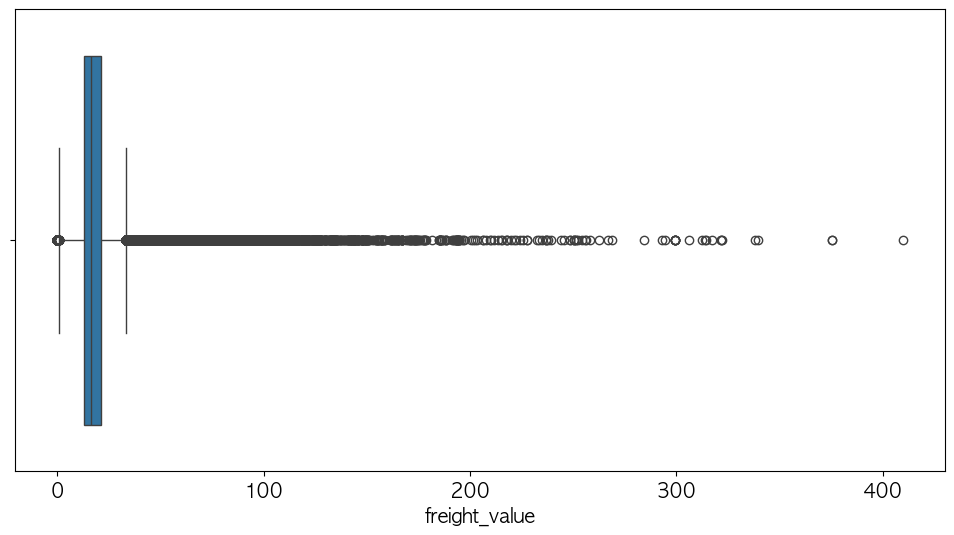

In [120]:
# 배송비를 가지고 boxplot을 시각화 해본다.
sns.boxplot(x=items['freight_value'])
plt.show()

In [121]:
# 필요한 데이터들을 병합한다.
df_h4 = pd.merge(orders, items, left_on='order_id', right_on='order_id', how='inner')
df_h4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [122]:
# 비싸다는 기분과 싸다는 기준을 정해야 한다.
# 배송비의 Q1(25%)보다 작으면 배송비가 싸다고 하고, 배송비의 Q3(75%)보다 크면 배송비가 비싸다고 가정하겠다.
q1, q3 = df_h4['freight_value'].quantile([0.25, 0.75])
print(f'q1 : {q1}')
print(f'q3 : {q3}')

q1 : 13.08
q3 : 21.15


In [123]:
# 배송비가 낮은 그룹
low_freight = df_h4.query('freight_value < @q1')
# 배송비가 높은 그룹
high_freight = df_h4.query('freight_value > @q3')

In [125]:
import numpy as np
# 교차표 생성

# 낮은 배송비 거래건 중 취소 거래 횟수, 낮은 배송비 거래건 중 취소하지 않은 거래 횟수
# 높은 배송비 거래건 중 취소 거래 횟수, 높은 배송비 거래건 중 취소하지 않은 거래 횟수

# 배송비가 낮은 그룹 중 취소한 거래 건
low_cancel = len(low_freight.query('order_status == "canceled"'))
low_ok = len(low_freight.query('order_status != "canceled"'))
high_cancel = len(high_freight.query('order_status == "canceled"'))
high_ok = len(high_freight.query('order_status != "canceled"'))

obs = np.array([
    [low_cancel, low_ok],
    [high_cancel, high_ok]
])

obs

array([[  201, 27925],
       [  114, 27992]])

In [126]:
# 카이 제곱 검증
_, p_value, _, _ = stats.chi2_contingency(obs)
print(f'p_value : {p_value:.3f}')

p_value : 0.000


In [127]:
# 배송비에 따른 취소 비율을 확인해본다.
high_rate = len(high_freight.query('order_status == "canceled"')) / len(high_freight) * 100
row_rate = len(low_freight.query('order_status == "canceled"')) / len(low_freight) * 100

print(f'배송비가 비싼 주문에 대한 취소율 : {high_rate:.2f}%')
print(f'배송비가 싼 주문에 대한 취소율 : {row_rate:.2f}%')

배송비가 비싼 주문에 대한 취소율 : 0.41%
배송비가 싼 주문에 대한 취소율 : 0.71%


- p value가 0.000으로 0.05보다 작으므로 "배송비가 비싸거나 싼 것은 취소 건수가 관계가 없다"라는 귀무 가설 기각한다.
- 배송비가 비싼 주문에 대한 취소율은 0.41%이고 배송비가 싼 주문에 대한 취소율은 0.71%로써 배송비가 싼 주문이 취소율이 더 높은 것으로 나타났다.
- 배송비를 낮춘다고 해서 취소율을 낮출 수 있는 것은 아니기 때문에 취소율을 낮추기 위한 다른 분석이 더 필요하다.

### 가설5) 제품 설명이 길수록 고객 만족도(평점)가 높을 것이다

In [128]:
# 필요한 데이터 병합
df_h5 = pd.merge(reviews, items, left_on='order_id', right_on='order_id', how='inner')
df_h5 = pd.merge(df_h5, products, left_on='product_id', right_on='product_id', how='inner')
df_h5

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,79.79,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,149.00,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,179.99,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,1,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,...,226.77,61.20,moveis_decoracao,56.0,623.0,1.0,7250.0,100.0,25.0,25.0
112368,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,1,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,...,199.99,9.77,brinquedos,51.0,465.0,1.0,2363.0,23.0,27.0,19.0
112369,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,...,215.97,15.59,papelaria,45.0,283.0,3.0,4100.0,40.0,37.0,29.0
112370,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,1,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,...,50.95,15.46,esporte_lazer,58.0,998.0,5.0,600.0,16.0,10.0,11.0


In [129]:
# 결측치를 제거한다.
df_h5 = df_h5.dropna(subset=['product_description_lenght'])
df_h5.isna().sum()

review_id                         0
order_id                          0
review_score                      0
review_comment_title          97418
review_comment_message        63839
review_creation_date              0
review_answer_timestamp           0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
dtype: int64

In [130]:
# 피어슨 상관관계를 확인한다.
corr, p_value = stats.pearsonr(df_h5['product_description_lenght'], df_h5['review_score'])
print(f'피어슨 상관 계수 : {corr:.3f}')
print(f'p value : {p_value:.3f}')

피어슨 상관 계수 : 0.013
p value : 0.000


- p value가 0.000으로써 0.05보다 작기 때문에 "제품 설명서의 글자 길이는 리뷰 점수와 관련이 없다"라는 귀무 가설을 기각한다.
- 하지만 피어슨 상관 계수가 0.013으로써 강한 관계를 가지고 있지는 않다고 볼 수 있다.

### 가설6) 사진이 많은 상품이 적은 상품보다 더 잘 팔릴 것이다.

In [140]:
# 병합
df_h6 = pd.merge(items, products, left_on='product_id', right_on='product_id', how='inner')
df_h6

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [141]:
# 각 제품별로 판매된 횟수를 구한다.
prod_sales = items['product_id'].value_counts().reset_index(name='sales')
prod_sales

,product_id,sales
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388
...,...,...
32946,dbc42f8ad8afd0147a5a46be630781f8,1
32947,5d86ed92606c80a89e547cdba3946812,1
32948,0b8750fa58fefe42cf03a9e2e4b8fce6,1
32949,a4758e74e2cdb74d0c4db83594ca14a3,1


In [142]:
# 결측치를 제거한다.
df_h6 = df_h6.dropna(subset=['product_photos_qty'])

# 사진 개수에 대한 Q1과 Q3을 구한다.
q1, q3 = df_h6['product_photos_qty'].quantile([0.25, 0.75])
print(f'q1 : {q1}')
print(f'q3 : {q3}')

q1 : 1.0
q3 : 3.0


In [143]:
# 사진이 적은 상품 그룹(q1보다 작게 해야 하지만 q1보다 작은 게 없으므로 q1과 같은 것으로 한다.)
group_few = df_h6.query('product_photos_qty == @q1')
# 사진이 많은 상품 그룹(q3 보다 큰 것
group_many = df_h6.query('product_photos_qty > @q3')

In [144]:
# 사진이 적은 상품이 팔린 구매 건수
group_few_sales = len(group_few)
# 사진이 많은 상품이 필린 구매 건수
group_many_sales = len(group_many)

--rere

In [145]:
# 각 제품별로 판매된 횟수를 구한다.
prod_sales = items['product_id'].value_counts().reset_index(name='sales')
prod_sales

,product_id,sales
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388
...,...,...
32946,dbc42f8ad8afd0147a5a46be630781f8,1
32947,5d86ed92606c80a89e547cdba3946812,1
32948,0b8750fa58fefe42cf03a9e2e4b8fce6,1
32949,a4758e74e2cdb74d0c4db83594ca14a3,1


In [146]:
# 병합한다.
df_h6 = pd.merge(products, prod_sales, left_on='product_id', right_on='product_id')
df_h6

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sales
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,1
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,1
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,1
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,1
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,33
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,2
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,7


In [147]:
# 사진의 개수가 결측치 인것을 제거한다.
df_h6 = df_h6.dropna(subset=['product_photos_qty'])
df_h6.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
sales                         0
dtype: int64

In [148]:
# 사진 개수에 대한 q1, q3를 구한다.
q1, q3 = df_h6['product_photos_qty'].quantile([0.25, 0.75])
print(f'q1 : {q1}')
print(f'q3 : {q3}')

q1 : 1.0
q3 : 3.0


In [149]:
# 사진수가 적은 것은 q1 보다 작은 것이 없으로 q1로 지정한다.
group_few = df_h6.query('product_photos_qty == @q1')
# 사진수가 많은 것은 q3보다 큰 것으로 지정한다.
group_many = df_h6.query('product_photos_qty > @q3')

In [150]:
# 독립 t 검증
t_test, p_value = stats.ttest_ind(group_few['sales'], group_many['sales'])
print(f'p value : {p_value}')

p value : 0.17636591791076406


### 가설7)카테고리별 평균 배송비 차이가 존재할 것이다.

In [152]:
# 병합
df_h7 = pd.merge(items, products, left_on='product_id', right_on='product_id', how='inner')
df_h7 = pd.merge(df_h7, translation, left_on='product_category_name', right_on='product_category_name', how='inner')
df_h7

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
111019,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
111020,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
111021,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [153]:
# 상품 카테고리 별로 몇 건씩 있는지..
df_h7['product_category_name_english'].value_counts()

product_category_name_english
bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
cds_dvds_musicals               14
la_cuisine                      14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

In [154]:
# 상위 5개에 해당하는 데이터만 사용한다.
# 상위 5개의 카테고리 이름을 가져온다.
top5 = df_h7['product_category_name_english'].value_counts().head(5).index
top5

Index(['bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor',
       'computers_accessories'],
      dtype='object', name='product_category_name_english')

In [155]:
# 상위 5개에 해당하는 데이터만 가져온다.
top_df_h7 = df_h7.query('product_category_name_english in @top5')
top_df_h7 = top_df_h7.reset_index(drop=True)
top_df_h7

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
1,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,beleza_saude,59.0,493.0,1.0,2000.0,30.0,12.0,16.0,health_beauty
2,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-03-29 22:28:09,59.99,8.88,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty
3,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.00,23.32,cama_mesa_banho,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,bed_bath_table
4,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,530ec6109d11eaaf87999465c6afee01,2018-08-17 12:15:10,99.90,27.65,esporte_lazer,56.0,1392.0,4.0,1050.0,40.0,20.0,30.0,sports_leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45582,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,cama_mesa_banho,50.0,696.0,2.0,200.0,25.0,5.0,18.0,bed_bath_table
45583,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
45584,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
45585,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [156]:
# 각 그룹별로 데이터를 추출한다.
# 각 그룹별 배송비 정보를 담을 리스트
top5_list = []

for category_name in top5 :
    # 현재 카테고리의 데이터만 추출한다.
    temp_df = df_h7.query('product_category_name_english == @category_name')
    # 배송비 정보만 추출하여 리스트에 담아 준다.
    top5_list.append(temp_df['freight_value'].values)

top5_list

[array([23.32,  8.88, 16.11, ..., 16.25, 22.06, 12.79], shape=(11115,)),
 array([11.65,  8.88,  7.78, ..., 18.69,  7.39,  7.75], shape=(9670,)),
 array([27.65, 13.71, 16.98, ..., 18.8 , 44.02, 16.95], shape=(8641,)),
 array([17.87, 25.51, 17.32, ..., 13.52, 16.19, 11.83], shape=(8334,)),
 array([44.29, 13.01, 18.21, ..., 48.14, 36.53,  8.72], shape=(7827,))]

In [159]:
# anova 테스트 시행
# f_stat, p_val = stats.f_oneway(top5_list[0], top5_list[1], top5_list[2], top5_list[3], top5_list[4])
f_stat, p_val = stats.f_oneway(*top5_list)
print(f'p value : {p_val:.3f}')

p value : 0.000


In [160]:
# 주요 5개 카테고리별 배송비 평균
top_df_h7.groupby('product_category_name_english')['freight_value'].mean()

product_category_name_english
bed_bath_table           18.415928
computers_accessories    18.821781
furniture_decor          20.728258
health_beauty            18.879703
sports_leisure           19.512500
Name: freight_value, dtype: float64

- p value가 0.000 으로 0.05보다 작으므로 'top 5 카테고리의 배송비 평균은 차이가 없다'라는 귀무 가설을 기각한다.
- ANOVA 테스트의 p value 0.05보다 작다는 것은 모든 그룹이 다 다르다가 아니라 적어도 1개 이상은 나머지와 다르다는 의미이다.
- 주요 카테고리별 평균 배송비를 확인해 본 결과 bed_bath_table, computers_accessories, health_beauty 는 약 18이고, sports_leisure 는 약 19, furniture_decor 는 약 20으로써 배송비 평균이 다른 것들과 다른 것들이 분명이 존재하고 있다.